In [ ]:
#Author: Jonathan Loyd
#Description: Python3 Using KFold, KNN, LR, and LSVC on Spam Data
#CSE590-12 Project 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# Get training and Testing data
train_set = pd.read_csv("spam_train.csv")
test_set = pd.read_csv("spam_test.csv")

X = np.array(train_set[list(train_set.columns[1:-1])])
Y = np.array(train_set["class"])

In [3]:
# Create 5 Fold
folds = 5
cv = KFold(n_splits=folds)

In [4]:
# Conduct KNN w/ KFold
train_scores = list() 
test_scores = list()
for K in range(0, 20):
    K = K+1
    CLF = KNeighborsClassifier(n_neighbors=K)
    i = 1
    train_score = 0
    test_score = 0

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        CLF.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", CLF.score(X_train, Y_train))
        print("  - Testing score = ", CLF.score(X_test, Y_test))
        train_score += CLF.score(X_train, Y_train)
        test_score += CLF.score(X_test, Y_test)

        i += 1
    train_score /= folds
    test_score /= folds
    print(f'TrainScore: {train_score}\nTestScore: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

Processing Fold # 1
  - Training score =  1.0
  - Testing score =  0.782608695652174
Processing Fold # 2
  - Training score =  0.9996376811594203
  - Testing score =  0.782608695652174
Processing Fold # 3
  - Training score =  0.9996376811594203
  - Testing score =  0.863768115942029
Processing Fold # 4
  - Training score =  0.9996376811594203
  - Testing score =  0.8115942028985508
Processing Fold # 5
  - Training score =  1.0
  - Testing score =  0.8130434782608695
TrainScore: 0.9997826086956522
TestScore: 0.8107246376811595
Processing Fold # 1
  - Training score =  0.9068840579710145
  - Testing score =  0.7797101449275362
Processing Fold # 2
  - Training score =  0.9068840579710145
  - Testing score =  0.7884057971014493
Processing Fold # 3
  - Training score =  0.8913043478260869
  - Testing score =  0.8101449275362319
Processing Fold # 4
  - Training score =  0.9036231884057971
  - Testing score =  0.7681159420289855
Processing Fold # 5
  - Training score =  0.9021739130434783
  

  - Testing score =  0.7507246376811594
Processing Fold # 5
  - Training score =  0.803623188405797
  - Testing score =  0.7739130434782608
TrainScore: 0.803695652173913
TestScore: 0.7692753623188405
Processing Fold # 1
  - Training score =  0.7978260869565217
  - Testing score =  0.7797101449275362
Processing Fold # 2
  - Training score =  0.803623188405797
  - Testing score =  0.7565217391304347
Processing Fold # 3
  - Training score =  0.7931159420289855
  - Testing score =  0.7884057971014493
Processing Fold # 4
  - Training score =  0.7967391304347826
  - Testing score =  0.7434782608695653
Processing Fold # 5
  - Training score =  0.7909420289855073
  - Testing score =  0.7797101449275362
TrainScore: 0.7964492753623188
TestScore: 0.7695652173913043
Processing Fold # 1
  - Training score =  0.797463768115942
  - Testing score =  0.7666666666666667
Processing Fold # 2
  - Training score =  0.8068840579710145
  - Testing score =  0.763768115942029
Processing Fold # 3
  - Training sc

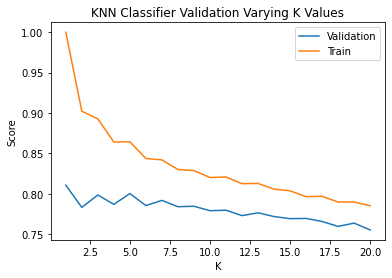

In [5]:
k_list = list(range(1, 21))
plt.plot(k_list, test_scores, label="Validation")
plt.plot(k_list, train_scores, label="Train")
plt.title('KNN Classifier Validation Varying K Values')
plt.ylabel('Score')
plt.xlabel('K')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('KNNfig.jpg')

In [6]:
print(np.max(test_scores), np.where(np.isclose(test_scores, np.max(test_scores))), "This is at k=1")

0.8107246376811595 (array([0], dtype=int64),) This is at k=1


In [7]:
# Rest Training and testing data 
X_train = np.array(train_set[list(train_set.columns[1:-1])])
Y_train = np.array(train_set["class"])
X_test = np.array(test_set[list(train_set.columns[1:-1])])
Y_test = np.array(test_set["class"])

# Conduct Best KNN
CLF = KNeighborsClassifier(n_neighbors=1)
CLF.fit(X_train, Y_train)
print("Testing Data for K = 1")
print("Training score = ", CLF.score(X_train, Y_train))
print("Testing score = ", CLF.score(X_test, Y_test))

cf = confusion_matrix(Y_test, CLF.predict(X_test))
print(cf)

Testing Data for K = 1
Training score =  0.9997101449275362
Testing score =  0.8027801911381407
[[571 103]
 [124 353]]


In [8]:
# Use logspace to create a range of C values
c_vals = np.logspace(-2, 0, num=10)
c_vals

array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])

In [9]:
# Conduct LR with KFold
train_scores = list() 
test_scores = list()
for C in c_vals:
    LR = LogisticRegression(max_iter=10000, C=C, penalty='l1', solver='liblinear')
    i = 1
    train_score = 0
    test_score = 0

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        LR.fit(X_train, Y_train)
        
        print('Processing Fold #', i)
        print("  - Training score = ", LR.score(X_train, Y_train))
        print("  - Testing score = ", LR.score(X_test, Y_test))
        train_score += LR.score(X_train, Y_train)
        test_score += LR.score(X_test, Y_test)

        i += 1
    train_score /= folds
    test_score /= folds
    print(f'TrainScore: {train_score}\nTestScore: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

Processing Fold # 1
  - Training score =  0.8445652173913043
  - Testing score =  0.8478260869565217
Processing Fold # 2
  - Training score =  0.8518115942028985
  - Testing score =  0.8391304347826087
Processing Fold # 3
  - Training score =  0.8394927536231884
  - Testing score =  0.8492753623188406
Processing Fold # 4
  - Training score =  0.8405797101449275
  - Testing score =  0.827536231884058
Processing Fold # 5
  - Training score =  0.8496376811594203
  - Testing score =  0.8594202898550725
TrainScore: 0.8452173913043477
TestScore: 0.8446376811594203
Processing Fold # 1
  - Training score =  0.8833333333333333
  - Testing score =  0.8855072463768116
Processing Fold # 2
  - Training score =  0.8855072463768116
  - Testing score =  0.8710144927536232
Processing Fold # 3
  - Training score =  0.8789855072463768
  - Testing score =  0.8884057971014493
Processing Fold # 4
  - Training score =  0.8793478260869565
  - Testing score =  0.8695652173913043
Processing Fold # 5
  - Trainin

[0.8446376811594203, 0.8826086956521738, 0.898550724637681, 0.9101449275362319, 0.9191304347826087, 0.9231884057971014, 0.9246376811594204, 0.9281159420289857, 0.928985507246377, 0.9298550724637682]


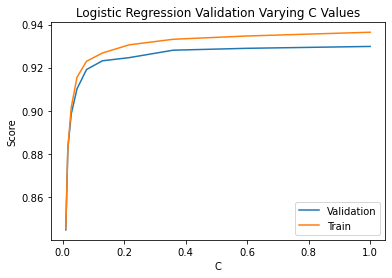

In [10]:
print(test_scores)
plt.plot(c_vals, test_scores, label="Validation")
plt.plot(c_vals, train_scores, label="Train")
plt.title('Logistic Regression Validation Varying C Values')
plt.ylabel('Score')
plt.xlabel('C')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('LRfig.jpg')

Logistic Regression graph looks to have underfitting as C decreases to 1 or less.

"The relationship, would be that lowering C - would strengthen the Lambda regulator."

In [11]:
print(np.max(test_scores), np.where(np.isclose(test_scores, np.max(test_scores))))
print("C_value: ", c_vals[8])
print(test_scores[9])
print(train_scores[9])

0.9298550724637682 (array([9], dtype=int64),)
C_value:  0.5994842503189409
0.9298550724637682
0.9364492753623187


In [12]:
# Reset Train and Test data
X_train = np.array(train_set[list(train_set.columns[1:-1])])
Y_train = np.array(train_set["class"])
X_test = np.array(test_set[list(train_set.columns[1:-1])])
Y_test = np.array(test_set["class"])

# Conduct Best LR
CLF = LogisticRegression(max_iter=10000, C=1, penalty='l1', solver='liblinear')
CLF.fit(X_train, Y_train)
print("Testing Data for C = 1")
print("Training score = ", CLF.score(X_train, Y_train))
print("Testing score = ", CLF.score(X_test, Y_test))

cf = confusion_matrix(Y_test, CLF.predict(X_test))
print(cf)

Testing Data for C = 1
Training score =  0.9350724637681159
Testing score =  0.9226759339704604
[[637  37]
 [ 52 425]]


In [13]:
print(CLF.coef_, train_set.columns[1:-1])

[[-3.58022354e-01 -1.13100680e-01  1.36874963e-01  5.12341257e-01
   5.63303715e-01  5.64878633e-01  2.41975415e+00  8.45226727e-01
   4.34651418e-01  1.41882875e-01  0.00000000e+00 -1.39723477e-01
   0.00000000e+00  9.03459759e-02  4.61055506e-01  8.22380015e-01
   7.36797133e-01  2.68947887e-01  6.50155770e-02  5.94114097e-01
   2.72391957e-01  2.54941436e-01  2.47927897e+00  8.43993998e-01
  -1.40224706e+00 -1.03860636e+00 -5.79172485e+00  2.52311594e-01
  -1.54721266e+00 -2.69108730e-01  0.00000000e+00  0.00000000e+00
  -6.54240737e-01  0.00000000e+00 -1.25855022e+00  6.34564674e-01
   0.00000000e+00 -3.45425557e-01 -7.29846910e-01 -1.86084663e-01
  -3.48349423e+00 -1.73783946e+00 -2.88136116e-01 -1.27841230e+00
  -6.22555709e-01 -1.35840985e+00 -1.20606861e+00 -1.81932003e+00
  -1.07555573e+00 -1.83752314e-01 -2.27955222e-01  1.05734645e+00
   4.72999090e+00  1.39256424e+00 -4.18031071e-03  6.53271929e-03
   6.03747329e-04]] Index(['word_freq_make', 'word_freq_address', 'word_freq

In [14]:
c_vals = np.linspace(.01, .1, num=10)
c_vals

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [15]:
# Conduct LSVC with KFold
train_scores = list() 
test_scores = list()
for C in c_vals:
    LSVC = LinearSVC(max_iter=100000, C=C)
    i = 1
    train_score = 0
    test_score = 0

    for train_index, test_index in cv.split(X):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        LSVC.fit(X_train, Y_train)

        print('Processing Fold #', i)
        print("  - Training score = ", LSVC.score(X_train, Y_train))
        print("  - Testing score = ", LSVC.score(X_test, Y_test))
        train_score += LSVC.score(X_train, Y_train)
        test_score += LSVC.score(X_test, Y_test)

        i += 1
    train_score /= folds
    test_score /= folds
    print(f'TrainScore: {train_score}\nTestScore: {test_score}')
    train_scores.append(train_score)
    test_scores.append(test_score)

C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 1
  - Training score =  0.925
  - Testing score =  0.9217391304347826


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 2
  - Training score =  0.9293478260869565
  - Testing score =  0.908695652173913


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 3
  - Training score =  0.9173913043478261
  - Testing score =  0.9420289855072463


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 4
  - Training score =  0.928623188405797
  - Testing score =  0.9260869565217391


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 5
  - Training score =  0.9304347826086956
  - Testing score =  0.9188405797101449
TrainScore: 0.926159420289855
TestScore: 0.9234782608695651


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 1
  - Training score =  0.9271739130434783
  - Testing score =  0.9231884057971015


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 2
  - Training score =  0.9307971014492754
  - Testing score =  0.9072463768115943


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 3
  - Training score =  0.9213768115942029
  - Testing score =  0.946376811594203


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 4
  - Training score =  0.9282608695652174
  - Testing score =  0.9246376811594202


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 5
  - Training score =  0.9326086956521739
  - Testing score =  0.9159420289855073
TrainScore: 0.9280434782608695
TestScore: 0.9234782608695653


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 1
  - Training score =  0.925
  - Testing score =  0.9246376811594202


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 2
  - Training score =  0.9326086956521739
  - Testing score =  0.908695652173913


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 3
  - Training score =  0.9184782608695652
  - Testing score =  0.946376811594203


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 4
  - Training score =  0.928623188405797
  - Testing score =  0.9217391304347826


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 5
  - Training score =  0.9351449275362319
  - Testing score =  0.9246376811594202
TrainScore: 0.9279710144927537
TestScore: 0.9252173913043478


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 1
  - Training score =  0.9253623188405797
  - Testing score =  0.9231884057971015


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 2
  - Training score =  0.9304347826086956
  - Testing score =  0.908695652173913


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 3
  - Training score =  0.9202898550724637
  - Testing score =  0.946376811594203


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 4
  - Training score =  0.927536231884058
  - Testing score =  0.9202898550724637


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 5
  - Training score =  0.9358695652173913
  - Testing score =  0.9246376811594202
TrainScore: 0.9278985507246377
TestScore: 0.9246376811594204


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 1
  - Training score =  0.9253623188405797
  - Testing score =  0.9231884057971015


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 2
  - Training score =  0.9322463768115942
  - Testing score =  0.908695652173913


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 3
  - Training score =  0.9210144927536232
  - Testing score =  0.9449275362318841


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 4
  - Training score =  0.9260869565217391
  - Testing score =  0.9188405797101449


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 5
  - Training score =  0.9358695652173913
  - Testing score =  0.9246376811594202
TrainScore: 0.9281159420289855
TestScore: 0.9240579710144928


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 1
  - Training score =  0.9235507246376812
  - Testing score =  0.9260869565217391


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 2
  - Training score =  0.9326086956521739
  - Testing score =  0.908695652173913


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 3
  - Training score =  0.9202898550724637
  - Testing score =  0.9434782608695652


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 4
  - Training score =  0.9268115942028986
  - Testing score =  0.9188405797101449


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 5
  - Training score =  0.9373188405797102
  - Testing score =  0.9260869565217391
TrainScore: 0.9281159420289855
TestScore: 0.9246376811594204


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 1
  - Training score =  0.9239130434782609
  - Testing score =  0.9260869565217391


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 2
  - Training score =  0.9326086956521739
  - Testing score =  0.9101449275362319


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 3
  - Training score =  0.9206521739130434
  - Testing score =  0.9420289855072463


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 4
  - Training score =  0.925
  - Testing score =  0.9173913043478261


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 5
  - Training score =  0.9347826086956522
  - Testing score =  0.9246376811594202
TrainScore: 0.9273913043478261
TestScore: 0.9240579710144928


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 1
  - Training score =  0.9264492753623188
  - Testing score =  0.9231884057971015


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 2
  - Training score =  0.9333333333333333
  - Testing score =  0.9101449275362319


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 3
  - Training score =  0.9213768115942029
  - Testing score =  0.9478260869565217


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 4
  - Training score =  0.9242753623188406
  - Testing score =  0.9173913043478261


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 5
  - Training score =  0.9380434782608695
  - Testing score =  0.9231884057971015
TrainScore: 0.928695652173913
TestScore: 0.9243478260869565


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 1
  - Training score =  0.9278985507246377
  - Testing score =  0.9217391304347826


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 2
  - Training score =  0.9322463768115942
  - Testing score =  0.908695652173913


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 3
  - Training score =  0.922463768115942
  - Testing score =  0.9478260869565217


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 4
  - Training score =  0.9264492753623188
  - Testing score =  0.9173913043478261


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 5
  - Training score =  0.9351449275362319
  - Testing score =  0.9202898550724637
TrainScore: 0.9288405797101449
TestScore: 0.9231884057971014


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 1
  - Training score =  0.9271739130434783
  - Testing score =  0.9231884057971015


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 2
  - Training score =  0.9304347826086956
  - Testing score =  0.9028985507246376


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 3
  - Training score =  0.9199275362318841
  - Testing score =  0.946376811594203


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Processing Fold # 4
  - Training score =  0.9268115942028986
  - Testing score =  0.9188405797101449
Processing Fold # 5
  - Training score =  0.9376811594202898
  - Testing score =  0.9217391304347826
TrainScore: 0.9284057971014494
TestScore: 0.9226086956521738


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


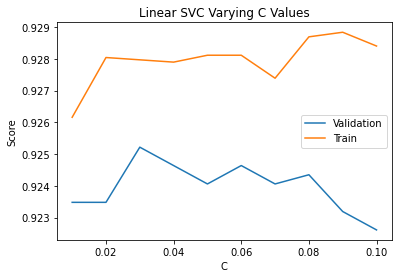

In [16]:
plt.plot(c_vals, test_scores, label="Validation")
plt.plot(c_vals, train_scores, label="Train")
plt.title('Linear SVC Varying C Values')
plt.ylabel('Score')
plt.xlabel('C')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('LSVCfig2.jpg')

In [17]:
print(np.max(test_scores), np.where(np.isclose(test_scores, np.max(test_scores))))
print("C_value: ", c_vals[2])
print(train_scores[2])

0.9252173913043478 (array([2], dtype=int64),)
C_value:  0.030000000000000006
0.9279710144927537


In [18]:
# Reset Train and Test Data
X_train = np.array(train_set[list(train_set.columns[1:-1])])
Y_train = np.array(train_set["class"])
X_test = np.array(test_set[list(train_set.columns[1:-1])])
Y_test = np.array(test_set["class"])

# Conduct Best LSVC
CLF = LinearSVC(max_iter=100000, C=.03)
CLF.fit(X_train, Y_train)
print("Testing Data for C = .03")
print("Training score = ", CLF.score(X_train, Y_train))
print("Testing score = ", CLF.score(X_test, Y_test))

cf = confusion_matrix(Y_test, CLF.predict(X_test))
print(cf)

Testing Data for C = .03
Training score =  0.9278260869565217
Testing score =  0.9183318853171155
[[636  38]
 [ 56 421]]


C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
CLF = svm.SVC(max_iter=100000, C=.03, kernel='linear')
CLF.fit(X_train, Y_train)
print(CLF.coef_, train_set.columns[1:-1])

[[-0.12399362  0.00179302  0.03178329  0.10917591  0.41149027  0.26217034
   0.90570787  0.55493115  0.30429159  0.00864681  0.07318537 -0.09745835
  -0.03763492 -0.00439106  0.03950963  0.50312499  0.36756828  0.32328031
   0.01373781  0.18432922  0.18293057  0.10663244  0.61945427  0.67546033
  -0.41123647 -0.20538517 -0.67292673  0.0241797  -0.29600252 -0.09644324
  -0.14571183 -0.08344856 -0.20445693 -0.08605043 -0.10267404  0.15804491
  -0.09120337 -0.20070139 -0.25821229 -0.21251807 -0.2199     -0.35000444
  -0.16823232 -0.34049273 -0.2187863  -0.44130873 -0.1242     -0.14825161
  -0.2962497  -0.13558189 -0.02237535  0.63053655  0.79592797  0.15867248
   0.02233613  0.0050538  -0.00171686]] Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_rep

C:\Users\jloyd\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
